In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.cluster.hierarchy import linkage ,dendrogram
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import AgglomerativeClustering
import warnings
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve
warnings.filterwarnings('ignore')

In [2]:
bank_df = pd.read_csv('bank_marketing_part1_Data.csv')

In [3]:
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
row, col = bank_df.shape
print("There are total {}".format(row), "rows and {}".format(col), "columns in the dataset")

There are total 210 rows and 7 columns in the dataset


In [6]:
bank_df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [7]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [8]:
bank_df.duplicated().sum()

0

In [9]:
dups = bank_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
bank_df[dups]

Number of duplicate rows = 0


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping


In [10]:
bank_df['spending'] = 1000* bank_df['spending']
bank_df['current_balance'] = 1000* bank_df['current_balance']
bank_df['max_spent_in_single_shopping'] = 1000* bank_df['max_spent_in_single_shopping']
bank_df['credit_limit'] = 10000* bank_df['credit_limit']
bank_df['advance_payments'] = 100* bank_df['advance_payments']
bank_df['min_payment_amt'] = 100* bank_df['min_payment_amt']

In [11]:
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0
2,18950.0,1642.0,0.8829,6248.0,37550.0,336.8,6148.0
3,10830.0,1296.0,0.8099,5278.0,26410.0,518.2,5185.0
4,17990.0,1586.0,0.8992,5890.0,36940.0,206.8,5837.0


In [12]:
def describe(col,nbins):
    print('\n\n Description of',col)
    print('------------------------------------------------')
    print(bank_df[col].describe(),end = ' ')

In [13]:
lst_num = bank_df.columns.values
len(lst_num)

7

In [14]:
for i in lst_num:
    describe(i,20)



 Description of spending
------------------------------------------------
count      210.000000
mean     14847.523810
std       2909.699431
min      10590.000000
25%      12270.000000
50%      14355.000000
75%      17305.000000
max      21180.000000
Name: spending, dtype: float64 

 Description of advance_payments
------------------------------------------------
count     210.000000
mean     1455.928571
std       130.595873
min      1241.000000
25%      1345.000000
50%      1432.000000
75%      1571.500000
max      1725.000000
Name: advance_payments, dtype: float64 

 Description of probability_of_full_payment
------------------------------------------------
count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: probability_of_full_payment, dtype: float64 

 Description of current_balance
------------------------------------------------
count     210.000000
mean     5628.533

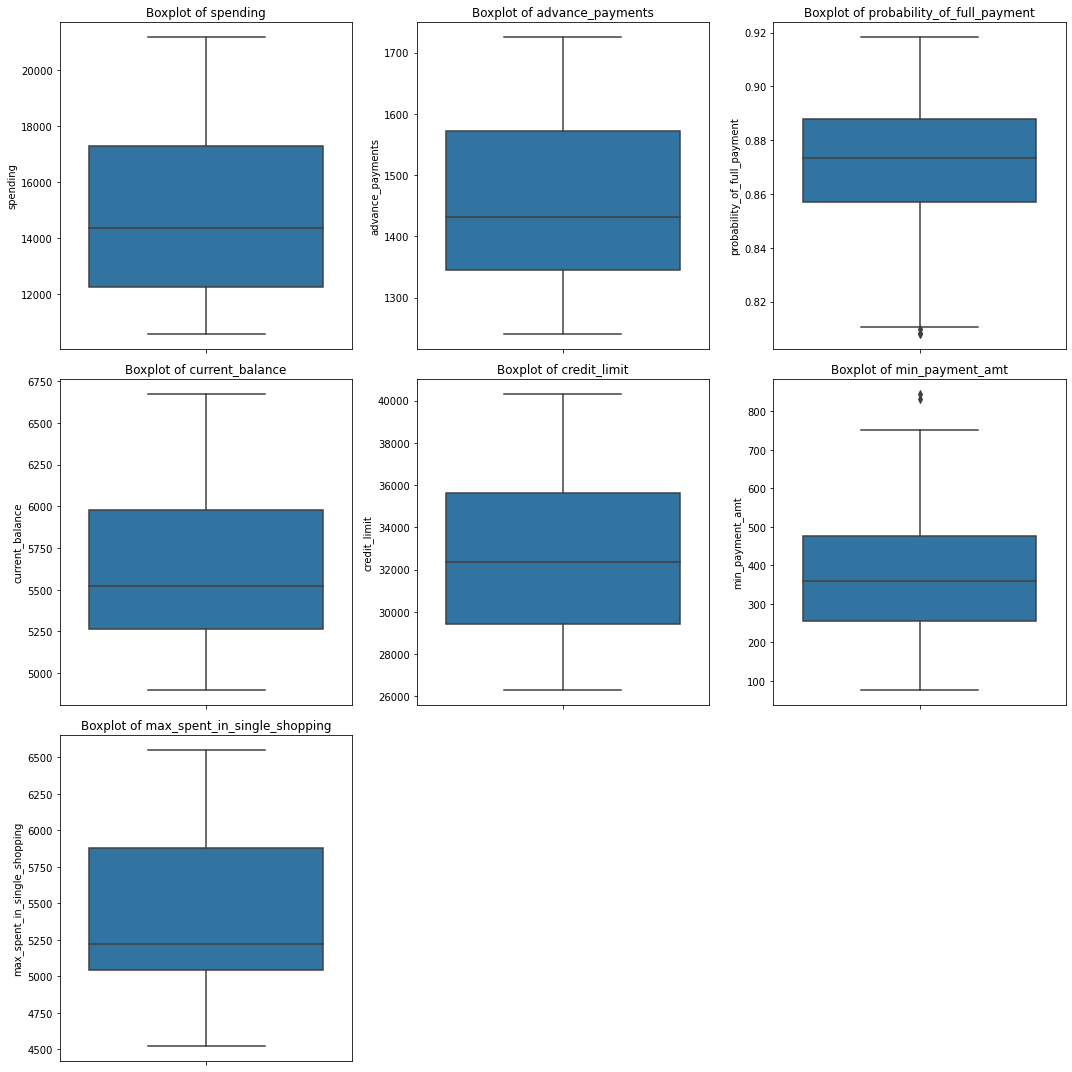

In [15]:
plt.figure(figsize = (15,15))
box = bank_df.columns
for i in range(len(box)):
    plt.subplot(3,3,i+1)
    sns.boxplot(y = bank_df[box[i]],data = bank_df)
    plt.title('Boxplot of {}'.format(box[i]))
    plt.tight_layout()

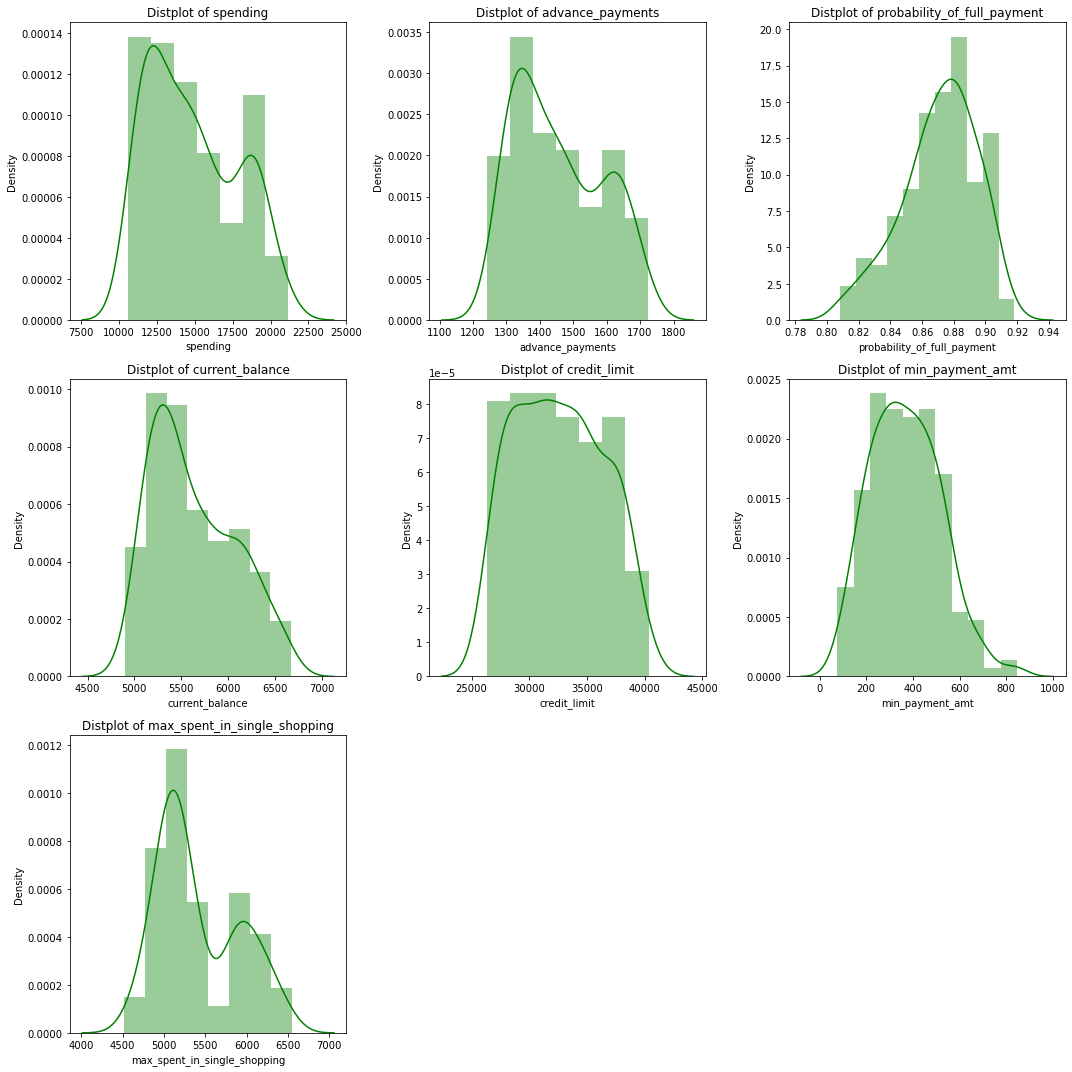

In [16]:
plt.figure(figsize=(15,15))
dist = bank_df.columns
for i in range(len(dist)):
    plt.subplot(3,3,i+1)
    sns.distplot(bank_df[dist[i]],kde = True,color = 'g')
    plt.title('Distplot of {}'.format(dist[i]))
    plt.tight_layout()

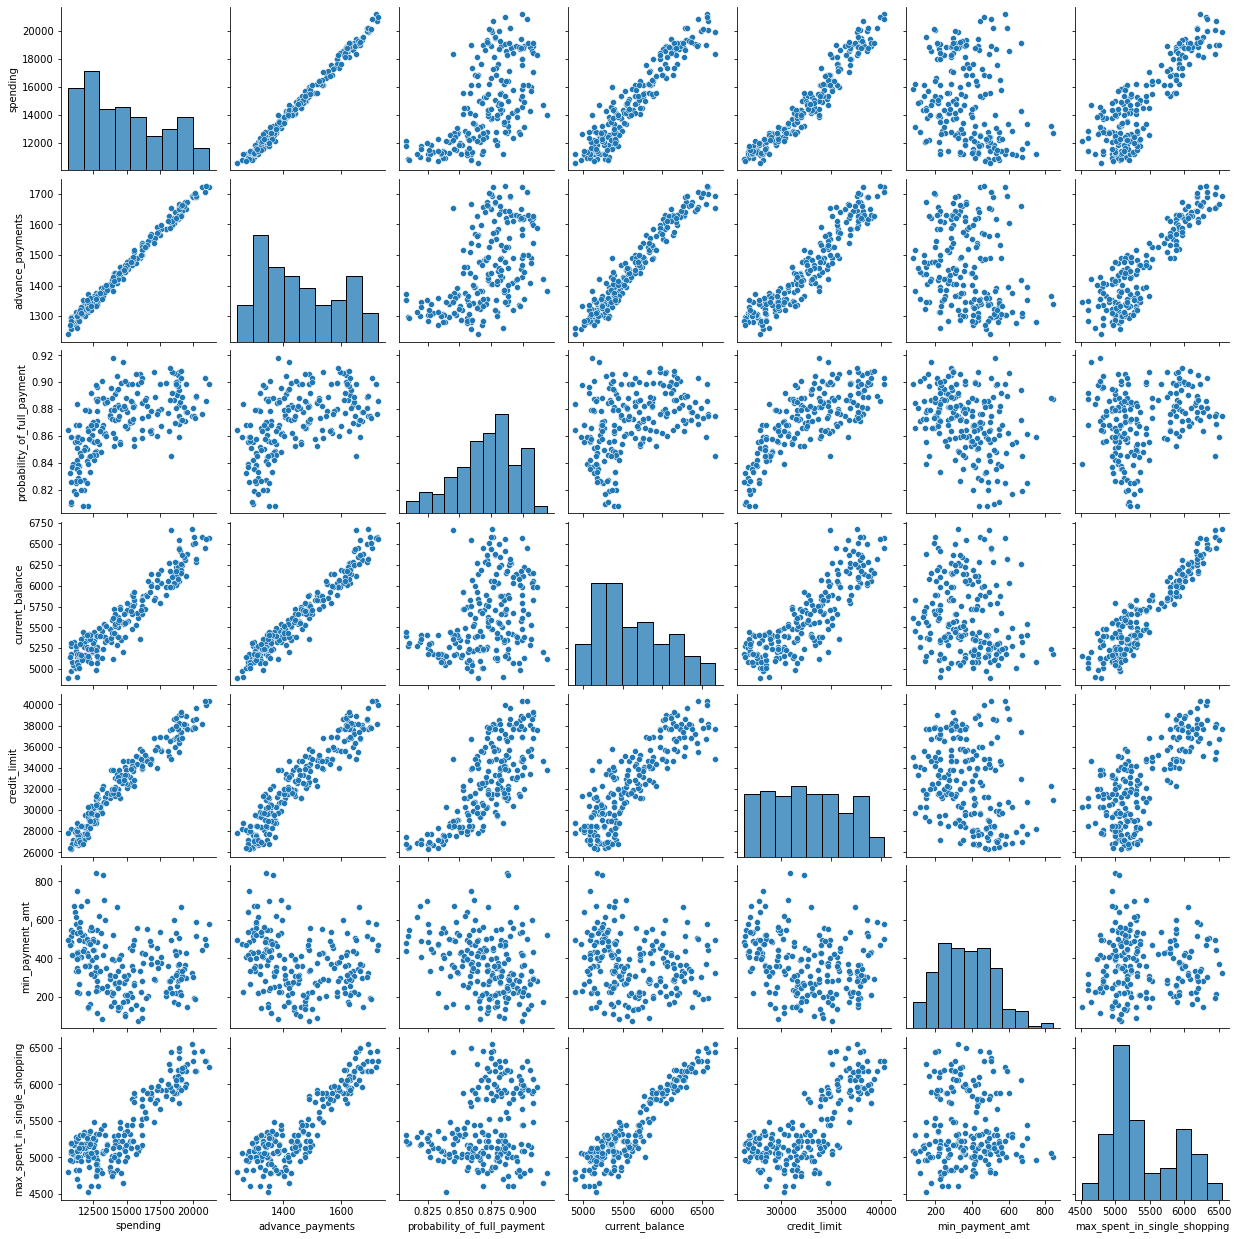

In [17]:
sns.pairplot(bank_df)

In [18]:
corr = bank_df.corr()
corr

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


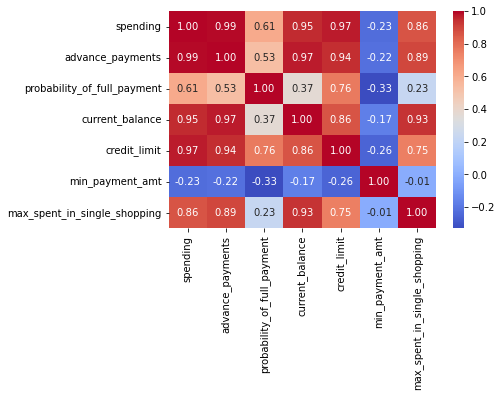

In [19]:
sns.heatmap(corr,cmap = 'coolwarm',fmt = '0.02f', annot  =True)
plt.show()

High correlation :
1.spending vs advanced payments
2.spending vs current balance
3.spending vs credit_limit
4.advanced payments vs current balance
5.advanced payments vs credit_limit
6.max_spend_in_single_shopping vs current balance ,advanced payments,spending
7.credit limit vs current balance 

In [20]:
bank_df['min_payment_amt'].value_counts()

270.0    2
222.1    2
212.9    2
325.2    1
352.1    1
        ..
195.5    1
517.3    1
599.5    1
290.8    1
264.0    1
Name: min_payment_amt, Length: 207, dtype: int64

In [21]:
#X = StandardScaler()
#scaled_df = X.fit_transform(df_bank)

min_max_scaler = preprocessing.MinMaxScaler()
scaled_df = min_max_scaler.fit_transform(bank_df)
print(scaled_df)

[[0.8829084  0.93181818 0.60889292 ... 0.80755524 0.32335617 1.        ]
 [0.50991501 0.51239669 0.89201452 ... 0.67854597 0.33427817 0.30773018]
 [0.78942398 0.8285124  0.67876588 ... 0.80185317 0.33843893 0.80206795]
 ...
 [0.32483475 0.36157025 0.64882033 ... 0.40698503 0.12376965 0.23732152]
 [0.52219075 0.53512397 0.83393829 ... 0.60940841 0.19567281 0.4549483 ]
 [0.47025496 0.5661157  0.40471869 ... 0.42836778 0.24378161 0.66962088]]


In [22]:
scaled_df = pd.DataFrame(scaled_df, index=bank_df.index, columns=bank_df.columns)
scaled_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,0.882908,0.931818,0.608893,1.000000,0.807555,0.323356,1.000000
1,0.509915,0.512397,0.892015,0.261261,0.678546,0.334278,0.307730
2,0.789424,0.828512,0.678766,0.759572,0.801853,0.338439,0.802068
3,0.022663,0.113636,0.016334,0.213401,0.007840,0.574302,0.327917
4,0.698772,0.712810,0.826679,0.557995,0.758375,0.169408,0.648941


In [23]:
HClust = linkage(scaled_df, method = 'ward')

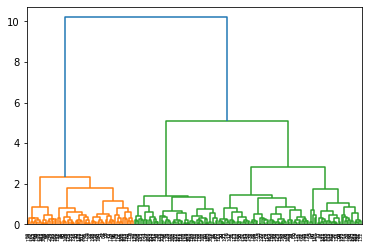

In [24]:
dend = dendrogram(HClust)

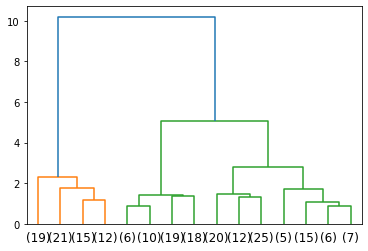

In [25]:
dend = dendrogram(HClust,truncate_mode = 'lastp',p = 15)

In [26]:
from scipy.cluster.hierarchy import fcluster

In [27]:
clusters_1 = fcluster(HClust, 3, criterion='maxclust')
clusters_1

array([1, 2, 1, 3, 1, 3, 3, 3, 1, 3, 1, 2, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3,
       1, 3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 1,
       3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 2, 3, 3, 2, 2, 1,
       1, 2, 1, 3, 2, 3, 1, 1, 3, 1, 2, 3, 1, 2, 2, 3, 2, 1, 3, 2, 2, 1,
       1, 3, 3, 1, 2, 3, 3, 1, 1, 1, 3, 1, 3, 1, 2, 1, 2, 1, 1, 3, 3, 1,
       2, 2, 1, 3, 3, 1, 2, 3, 3, 1, 3, 3, 3, 3, 2, 2, 1, 3, 2, 2, 3, 2,
       3, 1, 3, 1, 1, 3, 1, 2, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 2, 2,
       3, 2, 3, 3, 2, 1, 1, 3, 1, 1, 1, 3, 1, 2, 3, 3, 2, 3, 2, 1, 1, 1,
       2, 3, 2, 3, 2, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 2, 3, 1, 2, 1, 1, 3,
       1, 3, 2, 1, 2, 3, 1, 2, 1, 2, 2, 2], dtype=int32)

In [28]:
clusters_2 = fcluster(HClust, 5, criterion='distance')
clusters_2

array([1, 2, 1, 3, 1, 3, 3, 3, 1, 3, 1, 2, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3,
       1, 3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 1,
       3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 2, 3, 3, 2, 2, 1,
       1, 2, 1, 3, 2, 3, 1, 1, 3, 1, 2, 3, 1, 2, 2, 3, 2, 1, 3, 2, 2, 1,
       1, 3, 3, 1, 2, 3, 3, 1, 1, 1, 3, 1, 3, 1, 2, 1, 2, 1, 1, 3, 3, 1,
       2, 2, 1, 3, 3, 1, 2, 3, 3, 1, 3, 3, 3, 3, 2, 2, 1, 3, 2, 2, 3, 2,
       3, 1, 3, 1, 1, 3, 1, 2, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 2, 2,
       3, 2, 3, 3, 2, 1, 1, 3, 1, 1, 1, 3, 1, 2, 3, 3, 2, 3, 2, 1, 1, 1,
       2, 3, 2, 3, 2, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 2, 3, 1, 2, 1, 1, 3,
       1, 3, 2, 1, 2, 3, 1, 2, 1, 2, 2, 2], dtype=int32)

In [29]:
np.array_equal(clusters_1,clusters_2)

True

In [30]:
bank_df['H_clusters'] = clusters_1

In [31]:
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0,1
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0,2
2,18950.0,1642.0,0.8829,6248.0,37550.0,336.8,6148.0,1
3,10830.0,1296.0,0.8099,5278.0,26410.0,518.2,5185.0,3
4,17990.0,1586.0,0.8992,5890.0,36940.0,206.8,5837.0,1


In [32]:
bank_df['H_clusters'].value_counts().sort_index()

1    67
2    53
3    90
Name: H_clusters, dtype: int64

In [33]:
aggdata = bank_df.groupby('H_clusters').mean()

In [34]:
aggdata['freqency'] = bank_df['H_clusters'].value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freqency
H_clusters,,,,,,,,
1,18452.537313,1618.477612,0.884042,6173.567164,36920.597015,369.617910,6037.223881,67
2,14903.018868,1457.113208,0.881602,5595.660377,33147.547170,248.075660,5206.698113,53
3,12131.111111,1334.222222,0.855044,5242.144444,29028.555556,442.131222,5058.288889,90


In [35]:
from sklearn.cluster import KMeans 

In [36]:
wss =[] 
k=range(1,15)
for i in k:
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [37]:
wss

[88.98592483911845,
 34.81326792694563,
 22.02436307566604,
 18.66359716960423,
 16.316072764718346,
 14.477744414739819,
 13.133765395310538,
 12.033193026868636,
 11.052996563466934,
 10.307488210528593,
 9.781849724333263,
 9.085954075249498,
 8.730692113640282,
 8.208576967467893]

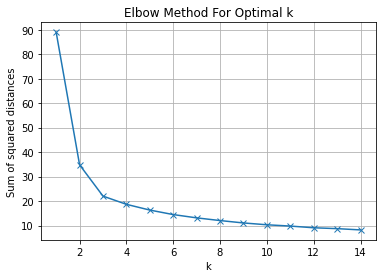

In [38]:
plt.plot(k, wss,'x-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

In [39]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

34.81326792694563

In [40]:
## Create K Means cluster and store the result in the object k_means with k=2
k_means2 = KMeans(n_clusters = 2)

# Fit K means on the scaled_df
k_means2.fit(scaled_df)
labels_2 = k_means2.labels_

In [41]:
silhouette_score(scaled_df,labels_2)

0.505113885588951

In [42]:
#Create K Means cluster and store the result in the object k_means with k=3
k_means3 = KMeans(n_clusters = 3)

# Fit K means on the scaled_df
k_means3.fit(scaled_df)
labels_3 = k_means3.labels_

In [43]:
silhouette_score(scaled_df,labels_3)

0.4221052568124793

In [44]:
k_means3.labels_

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       2, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 1, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       1, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2])

In [45]:
#Create K Means cluster and store the result in the object k_means with k=4
k_means4 = KMeans(n_clusters = 4)

# Fit K means on the scaled_df
k_means4.fit(scaled_df)
labels_4 = k_means4.labels_

In [46]:
silhouette_score(scaled_df,labels_4,random_state=1)

0.33846779137688054

# cluster profiling

In [47]:
bank_df['H_clusters'] = clusters_1

In [48]:
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0,1
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0,2
2,18950.0,1642.0,0.8829,6248.0,37550.0,336.8,6148.0,1
3,10830.0,1296.0,0.8099,5278.0,26410.0,518.2,5185.0,3
4,17990.0,1586.0,0.8992,5890.0,36940.0,206.8,5837.0,1


In [49]:
bank_df.H_clusters.value_counts().sort_index()

1    67
2    53
3    90
Name: H_clusters, dtype: int64

In [50]:
bank_df.to_csv('H_Cluster.csv')

In [51]:
clust_profile=bank_df.iloc[:,0:8].groupby('H_clusters').mean()
clust_profile['Freq']=bank_df.H_clusters.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
H_clusters,,,,,,,,
1,18452.537313,1618.477612,0.884042,6173.567164,36920.597015,369.617910,6037.223881,67
2,14903.018868,1457.113208,0.881602,5595.660377,33147.547170,248.075660,5206.698113,53
3,12131.111111,1334.222222,0.855044,5242.144444,29028.555556,442.131222,5058.288889,90


# Problem 2

In [52]:
# Importing all libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
sns.set_palette('bright')
from warnings import filterwarnings
filterwarnings('ignore')

In [53]:
# Loading the dataset
insur_df = pd.read_csv('insurance_part2_data.csv')

In [54]:
insur_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


# EDA

In [55]:
# checking the rows and columns in the dataset
insur_df.shape

(3000, 10)

In [56]:
# information on the dataset
insur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [57]:
# checking for duplicates
print('There are',insur_df.duplicated().sum(),'duplicates in this dataset')

There are 139 duplicates in this dataset


In [58]:
insur_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.5,63.0,4580.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


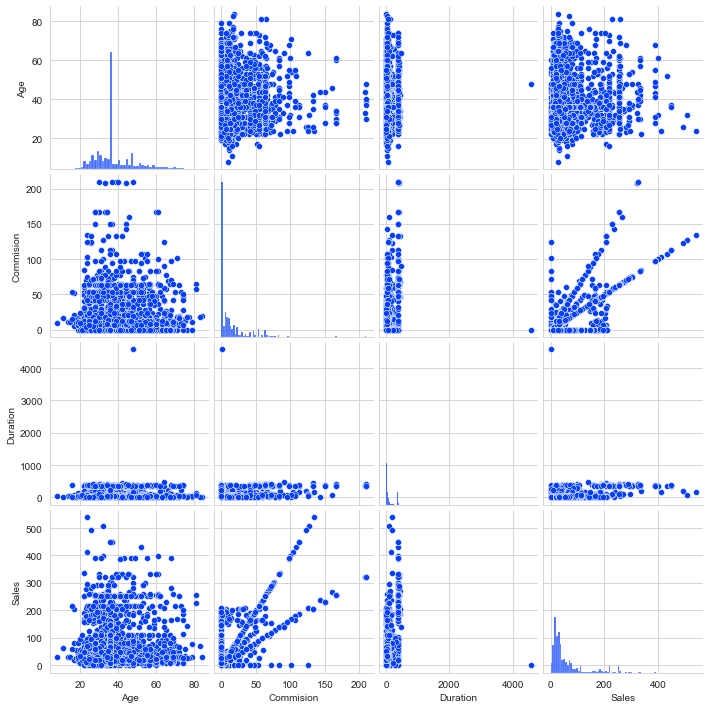

In [59]:
sns.pairplot(insur_df[['Age','Commision','Duration', 'Sales']])
plt.show()

In [60]:
insur_df.isnull().values.sum()

0

In [61]:
insur_df.loc[1508]

Age                      25
Agency_Code             JZI
Type               Airlines
Claimed                  No
Commision               6.3
Channel              Online
Duration                 -1
Sales                  18.0
Product Name    Bronze Plan
Destination            ASIA
Name: 1508, dtype: object

Let us segregate the data into numerical and categorical dataframes

In [62]:
df_with_outliers = insur_df

In [63]:
df_numerical = insur_df[['Age', 'Duration', 'Commision', 'Sales']]
df_numerical.head()

,Age,Duration,Commision,Sales
0,48,7,0.70,2.51
1,36,34,0.00,20.00
2,39,3,5.94,9.90
3,36,4,0.00,26.00
4,33,53,6.30,18.00


In [64]:
df_categorical = insur_df[['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name', 'Destination']]
df_categorical.head()

,Agency_Code,Type,Claimed,Channel,Product Name,Destination
0,C2B,Airlines,No,Online,Customised Plan,ASIA
1,EPX,Travel Agency,No,Online,Customised Plan,ASIA
2,CWT,Travel Agency,No,Online,Customised Plan,Americas
3,EPX,Travel Agency,No,Online,Cancellation Plan,ASIA
4,JZI,Airlines,No,Online,Bronze Plan,ASIA


In [65]:
df_categorical['Claimed'].value_counts(normalize=True)

No     0.692
Yes    0.308
Name: Claimed, dtype: float64

In [66]:
df_categorical['Claimed'].value_counts()

No     2076
Yes     924
Name: Claimed, dtype: int64

# Univariate Analysis

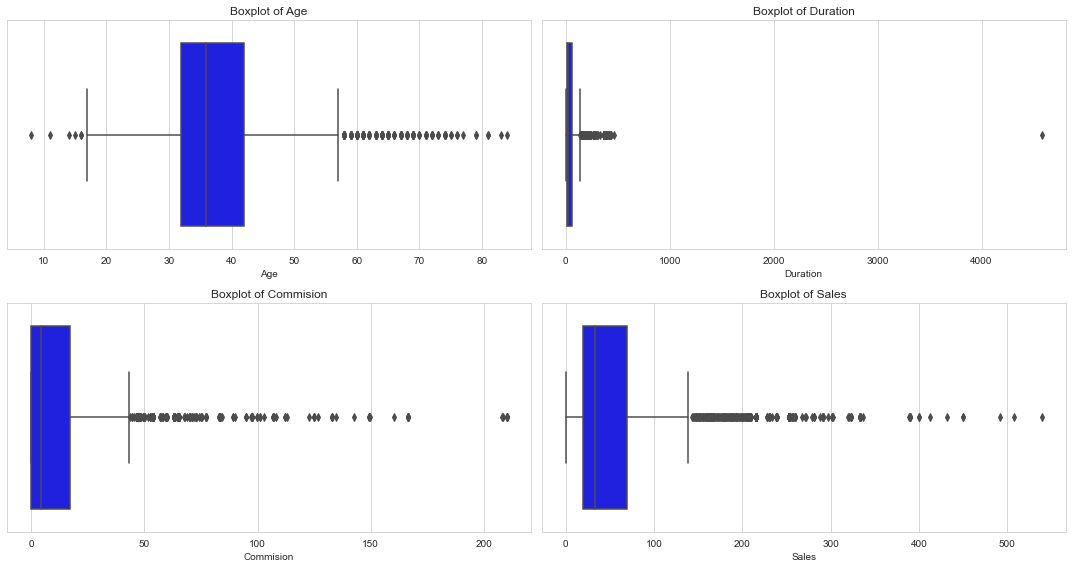

In [67]:
plt.figure(figsize = (15,8))
feature_list = df_numerical.columns
for i in range(len(feature_list)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df_numerical[feature_list[i]], data=df_numerical, orient='h', color='b')
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [68]:
from scipy.stats import norm

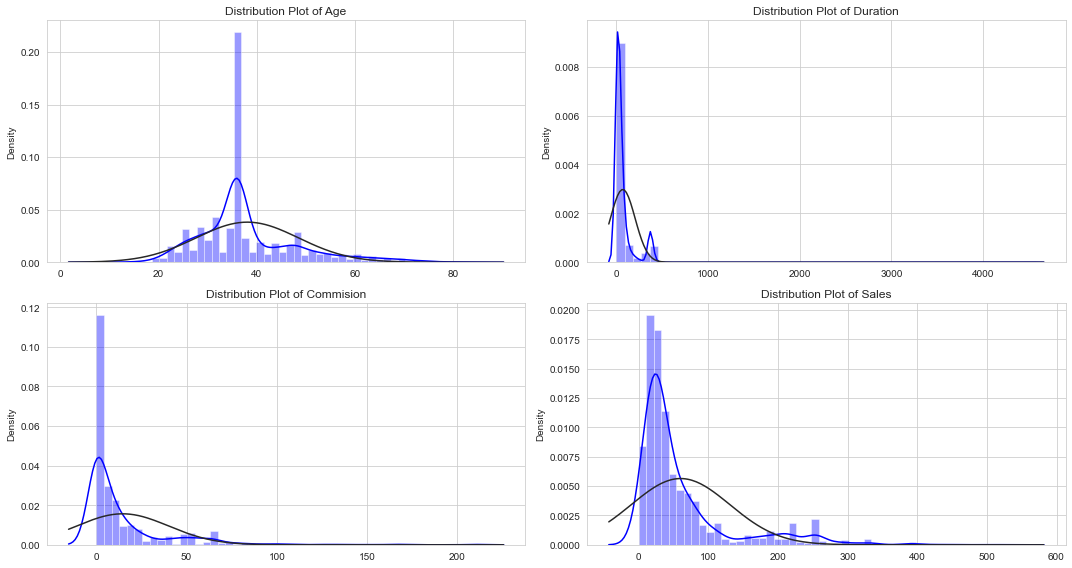

In [69]:
plt.figure(figsize = (15,8))
feature_list = df_numerical.columns
for i in range(len(feature_list)):
    plt.subplot(2,2,i+1)
    sns.distplot(x=df_numerical[feature_list[i]], color='b', fit=norm)
    plt.title('Distribution Plot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [70]:
for columns in df_numerical.columns:
    print('Skewness of {} is'.format(columns), round(df_numerical[columns].skew(),2))
    print('Kurtosis of {} is'.format(columns), round(df_numerical[columns].kurt(),2))

Skewness of Age is 1.15
Kurtosis of Age is 1.65
Skewness of Duration is 13.78
Kurtosis of Duration is 427.59
Skewness of Commision is 3.15
Kurtosis of Commision is 13.98
Skewness of Sales is 2.38
Kurtosis of Sales is 6.16


# Bivariate Analysis

Plotting numerical variables w.r.t Claimed status

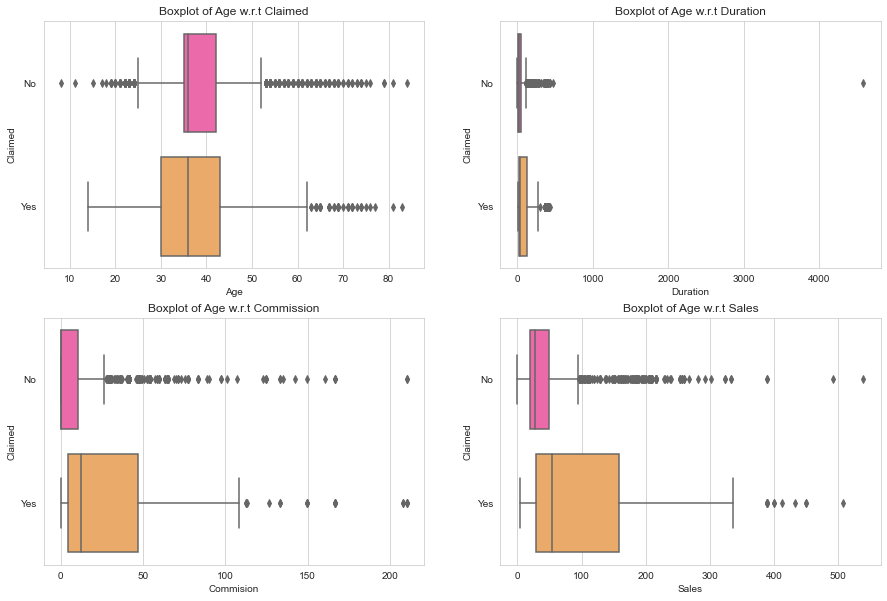

In [71]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(y='Claimed', x='Age', data=insur_df, palette='spring')
plt.title('Boxplot of Age w.r.t Claimed')

plt.subplot(2,2,2)
sns.boxplot(y='Claimed', x='Duration', data=insur_df, palette='spring')
plt.title('Boxplot of Age w.r.t Duration')

plt.subplot(2,2,3)
sns.boxplot(y='Claimed', x='Commision', data=insur_df, palette='spring')
plt.title('Boxplot of Age w.r.t Commission')

plt.subplot(2,2,4)
sns.boxplot(y='Claimed', x='Sales', data=insur_df, palette='spring')
plt.title('Boxplot of Age w.r.t Sales');

Plotting Age with categorical variables w.r.t Claimed status

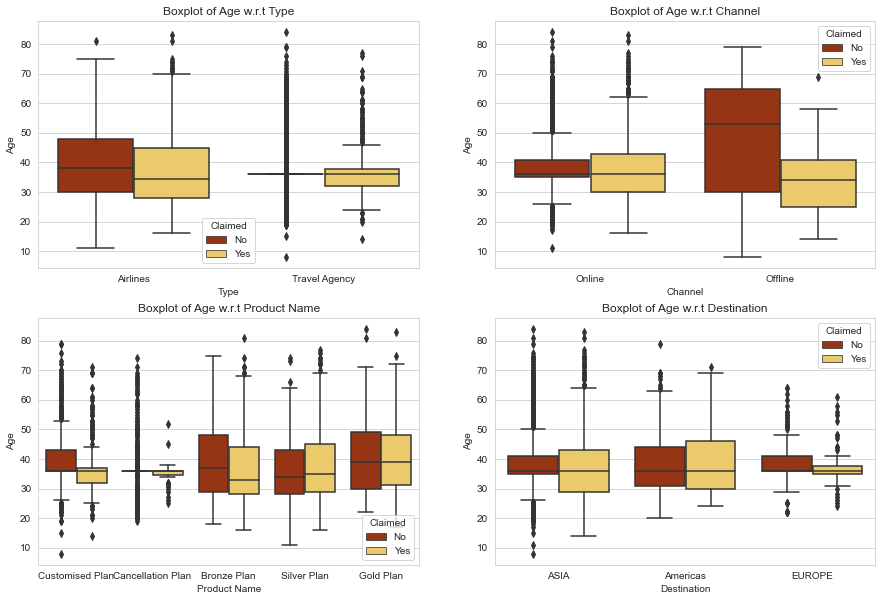

In [72]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(y='Age', x='Type', hue='Claimed', data=insur_df, palette='afmhot')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Boxplot of Age w.r.t Type')

plt.subplot(2,2,2)
sns.boxplot(y='Age', x='Channel', hue='Claimed', data=insur_df, palette='afmhot')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Boxplot of Age w.r.t Channel')

plt.subplot(2,2,3)
sns.boxplot(y='Age', x='Product Name', hue='Claimed', data=insur_df, palette='afmhot')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Boxplot of Age w.r.t Product Name');

plt.subplot(2,2,4)
sns.boxplot(y='Age', x='Destination', hue='Claimed', data=insur_df, palette='afmhot')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Boxplot of Age w.r.t Destination');

Plotting Commission with categorical variables w.r.t Claimed status

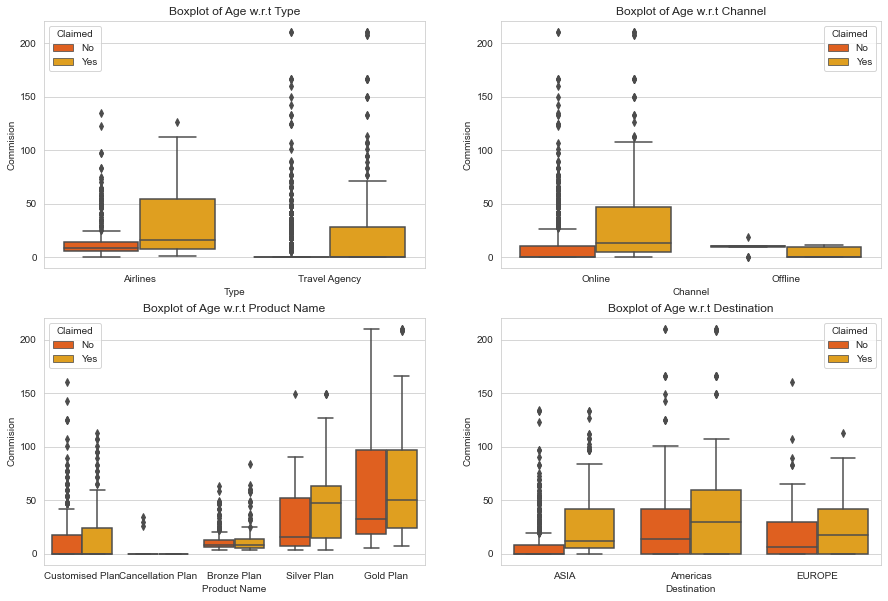

In [73]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(y='Commision', x='Type', hue='Claimed', data=insur_df, palette='autumn')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Boxplot of Age w.r.t Type')

plt.subplot(2,2,2)
sns.boxplot(y='Commision', x='Channel', hue='Claimed', data=insur_df, palette='autumn')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Boxplot of Age w.r.t Channel')

plt.subplot(2,2,3)
sns.boxplot(y='Commision', x='Product Name', hue='Claimed', data=insur_df, palette='autumn')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Boxplot of Age w.r.t Product Name');

plt.subplot(2,2,4)
sns.boxplot(y='Commision', x='Destination', hue='Claimed', data=insur_df, palette='autumn')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Boxplot of Age w.r.t Destination');

Plotting Duration with categorical variables w.r.t Claimed status

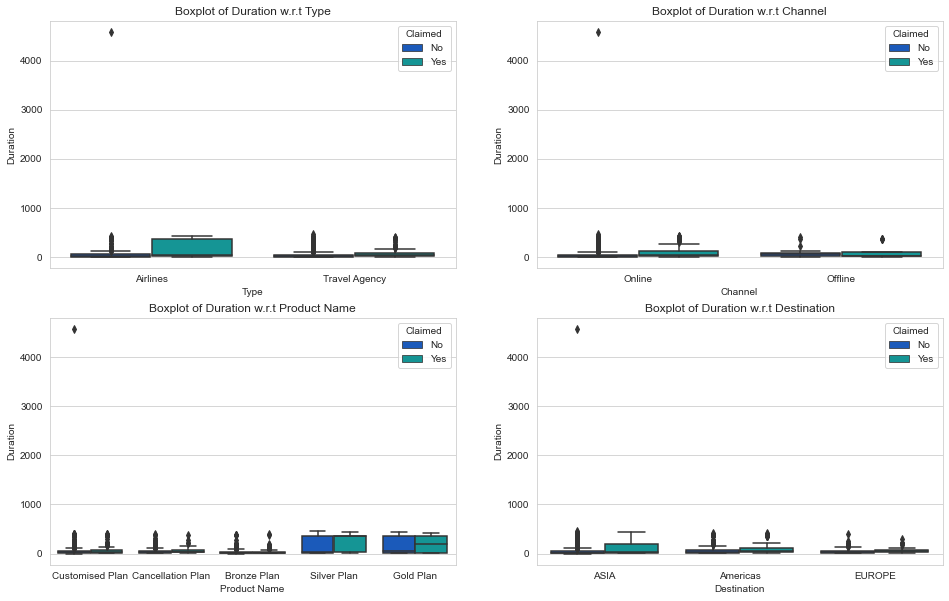

In [74]:
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
sns.boxplot(y='Duration', x='Type', hue='Claimed', data=insur_df, palette='winter')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Boxplot of Duration w.r.t Type')

plt.subplot(2,2,2)
sns.boxplot(y='Duration', x='Channel', hue='Claimed', data=insur_df, palette='winter')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Boxplot of Duration w.r.t Channel')

plt.subplot(2,2,3)
sns.boxplot(y='Duration', x='Product Name', hue='Claimed', data=insur_df, palette='winter')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Boxplot of Duration w.r.t Product Name');

plt.subplot(2,2,4)
sns.boxplot(y='Duration', x='Destination', hue='Claimed', data=insur_df, palette='winter')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Boxplot of Duration w.r.t Destination');

Plotting Sales with categorical variables w.r.t Claimed status

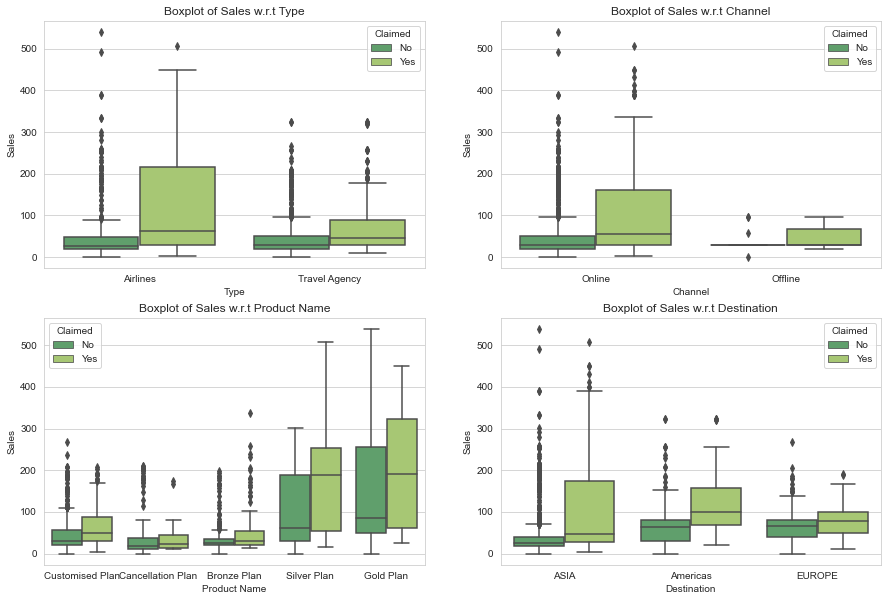

In [75]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(y='Sales', x='Type', hue='Claimed', data=insur_df, palette='summer')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Boxplot of Sales w.r.t Type')

plt.subplot(2,2,2)
sns.boxplot(y='Sales', x='Channel', hue='Claimed', data=insur_df, palette='summer')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Boxplot of Sales w.r.t Channel')

plt.subplot(2,2,3)
sns.boxplot(y='Sales', x='Product Name', hue='Claimed', data=insur_df, palette='summer')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Boxplot of Sales w.r.t Product Name');

plt.subplot(2,2,4)
sns.boxplot(y='Sales', x='Destination', hue='Claimed', data=insur_df, palette='summer')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Boxplot of Sales w.r.t Destination');

In [76]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [77]:
lrAge,urAge=remove_outlier(insur_df['Age'])
insur_df['Age']=np.where(insur_df['Age']>urAge,urAge,insur_df['Age'])
insur_df['Age']=np.where(insur_df['Age']<lrAge,lrAge,insur_df['Age'])


lrDuration,urDuration=remove_outlier(insur_df['Duration'])
insur_df['Duration']=np.where(insur_df['Duration']>urDuration,urDuration,insur_df['Duration'])
insur_df['Duration']=np.where(insur_df['Duration']<lrDuration,lrDuration,insur_df['Duration'])

lrCommision,urCommision=remove_outlier(insur_df['Commision'])
insur_df['Commision']=np.where(insur_df['Commision']>urCommision,urCommision,insur_df['Commision'])
insur_df['Commision']=np.where(insur_df['Commision']<lrCommision,lrCommision,insur_df['Commision'])

lrSales,urSales=remove_outlier(insur_df['Sales'])
insur_df['Sales']=np.where(insur_df['Sales']>urSales,urSales,insur_df['Sales'])
insur_df['Sales']=np.where(insur_df['Sales']<lrSales,lrSales,insur_df['Sales'])

insur_df.shape

(3000, 10)

<AxesSubplot:>

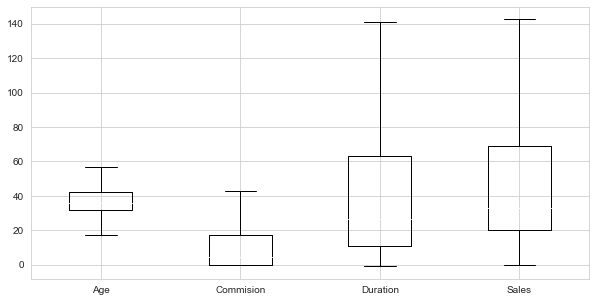

In [78]:
plt.figure(figsize=(10,5))
insur_df[['Age','Commision', 'Duration', 'Sales']].boxplot()

In [79]:
corr = insur_df.corr()
corr

,Age,Commision,Duration,Sales
Age,1.000000,0.070513,0.013557,0.021783
Commision,0.070513,1.000000,0.458139,0.686219
Duration,0.013557,0.458139,1.000000,0.542815
Sales,0.021783,0.686219,0.542815,1.000000


# Multivariate Analysis

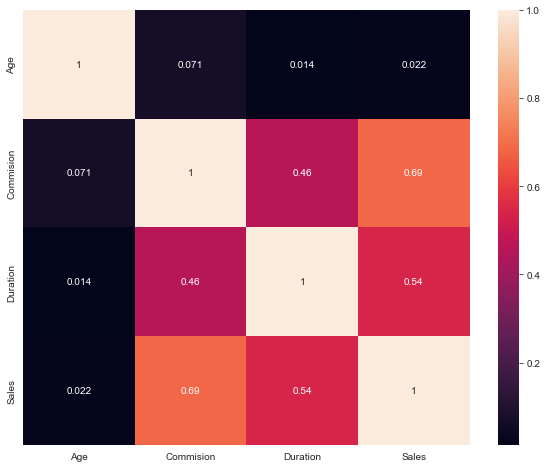

In [80]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True);

In [81]:
insur_df['Agency_Code'].value_counts()

EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64

In [82]:
for column in insur_df.columns:
    if insur_df[column].dtype == 'object':
        insur_df[column] = pd.Categorical(insur_df[column]).codes

In [83]:
insur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   float64
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   float64
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(4), int8(6)
memory usage: 111.5 KB


In [84]:
insur_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0,0.00,1,34.0,20.00,2,0
2,39.0,1,1,0,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0,0.00,1,4.0,26.00,1,0
4,33.0,3,0,0,6.30,1,53.0,18.00,0,0


In [85]:
df_categorical['Claimed'].value_counts()

No     2076
Yes     924
Name: Claimed, dtype: int64

In [86]:
# Let us check the proportion of our target variable
# Claimed "No" = 0
# Claimed "Yes" = 1
insur_df['Claimed'].value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

In [87]:
insur_df.Claimed.value_counts()

0    2076
1     924
Name: Claimed, dtype: int64

In [88]:
print("Percentage of 0's",round(insur_df.Claimed.value_counts().values[0]/insur_df.Claimed.count()*100,2),'%')
print("Percentage of 1's",round(insur_df.Claimed.value_counts().values[1]/insur_df.Claimed.count()*100,2),'%')

Percentage of 0's 69.2 %
Percentage of 1's 30.8 %


Claimed proportion is less as compared to unclaimed

# Data Split

In [89]:
for feature in insur_df.columns: 
    if insur_df[feature].dtype == 'object': 
        insur_df[feature] = pd.Categorical(insur_df[feature]).codes

In [90]:
insur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   float64
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   float64
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(4), int8(6)
memory usage: 111.5 KB


# Extracting the target column into separate vectors for training set and test set

In [91]:
X = insur_df.drop('Claimed', axis=1)

y = insur_df.pop('Claimed')

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0.00,1,34.0,20.00,2,0
2,39.0,1,1,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0.00,1,4.0,26.00,1,0
4,33.0,3,0,6.30,1,53.0,18.00,0,0


Splitting data into training and test set

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y) 

In [94]:
from scipy.stats import zscore
insur_df_scaled=insur_df.apply(zscore)
insur_df_scaled.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,1.146411,-1.314358,-1.256796,-0.696062,0.124788,-0.840076,-1.120660,0.268835,-0.434646
1,-0.172988,0.697928,0.795674,-0.742656,0.124788,-0.245927,-0.706281,0.268835,-0.434646
2,0.156862,-0.308215,0.795674,-0.347272,0.124788,-0.928098,-0.945573,0.268835,1.303937
3,-0.172988,0.697928,0.795674,-0.742656,0.124788,-0.906093,-0.564127,-0.525751,-0.434646
4,-0.502838,1.704071,-1.256796,-0.323309,0.124788,0.172179,-0.753665,-1.320338,-0.434646


In [95]:
y_train.value_counts(normalize=True)

0    0.691905
1    0.308095
Name: Claimed, dtype: float64

In [96]:
y_test.value_counts(normalize=True)

0    0.692222
1    0.307778
Name: Claimed, dtype: float64

Checking the dimensions of the training and test data

In [97]:
insur_df.shape

(3000, 9)

In [98]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (2100, 9)
X_test: (900, 9)
y_train: (2100,)
y_test: (900,)


# Decision Tree Classifier Model

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
param_grid = {
    'max_depth': [7, 8, 9],
    'min_samples_leaf': [15, 20, 25],
    'min_samples_split': [45, 60, 75]
}

dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)

In [101]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [7, 8, 9],
                         'min_samples_leaf': [15, 20, 25],
                         'min_samples_split': [45, 60, 75]})

In [102]:
grid_search.best_params_

{'max_depth': 7, 'min_samples_leaf': 15, 'min_samples_split': 75}

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
dtree_model = DecisionTreeClassifier(criterion='gini', random_state=0)

In [105]:
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [106]:
from sklearn import tree

In [107]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dtree_model, out_file=Credit_Tree_File, feature_names = ['Age', 'Agency_Code', 'Type', 'Commision', 'Channel', 'Duration', 'Sales','Product Name', 'Destination'], class_names = list(train_char_label))

Credit_Tree_File.close()

In [108]:
best_grid = grid_search.best_estimator_

In [109]:
ytrain_predict = best_grid.predict(X_test)
ytest_predict = best_grid.predict(X_test)

In [110]:
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.883333,0.116667
1,0.865385,0.134615
2,0.914286,0.085714
3,0.714286,0.285714
4,0.200000,0.800000


# Random Forest Classifier

In [111]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 8],
    'max_features': [6, 7, 8],
    'min_samples_leaf': [20, 25],
    'min_samples_split': [60, 75],
    'n_estimators': [100, 300]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)


In [112]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 8], 'max_features': [6, 7, 8],
                         'min_samples_leaf': [20, 25],
                         'min_samples_split': [60, 75],
                         'n_estimators': [100, 300]})

In [113]:
grid_search.best_params_

{'max_depth': 8,
 'max_features': 7,
 'min_samples_leaf': 20,
 'min_samples_split': 60,
 'n_estimators': 100}

In [114]:
best_grid = grid_search.best_estimator_

In [115]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [116]:
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.921644,0.078356
1,0.971802,0.028198
2,0.942198,0.057802
3,0.623820,0.376180
4,0.364782,0.635218


# MLP Classifier (Artificial Neural Network)

In [117]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [118]:
param_grid = {
    'hidden_layer_sizes': [(100,100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01],
    'max_iter' : [10000]
}

rfcl = MLPClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [119]:
grid_search.fit(X_trains, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(100, 100, 100)],
                         'max_iter': [10000], 'solver': ['sgd', 'adam'],
                         'tol': [0.1, 0.01]})

In [120]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.1}

In [121]:
best_grid = grid_search.best_estimator_

In [122]:
ytrain_predict = best_grid.predict(X_trains)
ytest_predict = best_grid.predict(X_tests)

In [123]:
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.007309,9.926905e-01
1,0.916489,8.351096e-02
2,0.603301,3.966990e-01
3,1.000000,3.949924e-07
4,0.026305,9.736948e-01


# 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

# Accuracy Score, Classification Report, Confusion Matrix, ROC curve, ROC_AUC score

# Decision Tree Classifier

In [124]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [125]:
confusion_matrix(y_train,ytrain_predict)

array([[1261,  192],
       [ 248,  399]], dtype=int64)

In [126]:
confusion_matrix(y_test,ytest_predict)

array([[549,  74],
       [128, 149]], dtype=int64)

In [127]:
dtc=DecisionTreeClassifier(random_state=0)

In [128]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [129]:
prediction_dtc=dtc.predict(X_train)

Accuracy for DecisionTreeClassifier model is 
 0.9838095238095238


Classification report for DecisionTreeClassifier model is 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1453
           1       0.97      0.98      0.97       647

    accuracy                           0.98      2100
   macro avg       0.98      0.98      0.98      2100
weighted avg       0.98      0.98      0.98      2100



Confusion Matrix for DecisionTreeClassifier model is


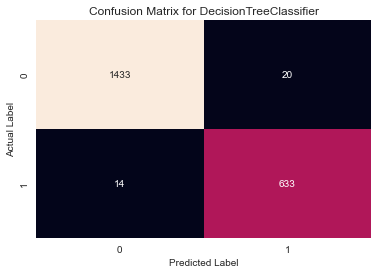

In [130]:
models_names={dtc:'DecisionTreeClassifier'}

print('Accuracy for {} model is'.format(models_names[dtc]),'\n',accuracy_score(y_train,prediction_dtc))
print('\n')
print('Classification report for {} model is'.format(models_names[dtc]),'\n',classification_report(y_train,prediction_dtc))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[dtc]))
sns.heatmap(confusion_matrix(y_train,prediction_dtc),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[dtc]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

# Random Forest Classifier

In [131]:
rfc=RandomForestClassifier(random_state=0)

In [132]:
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [133]:
prediction_rfc=rfc.predict(X_train)

Accuracy for RandomForestClassifier model is 
 0.9838095238095238


Classification report for RandomForestClassifier model is 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1453
           1       0.96      0.99      0.97       647

    accuracy                           0.98      2100
   macro avg       0.98      0.99      0.98      2100
weighted avg       0.98      0.98      0.98      2100



Confusion Matrix for RandomForestClassifier model is


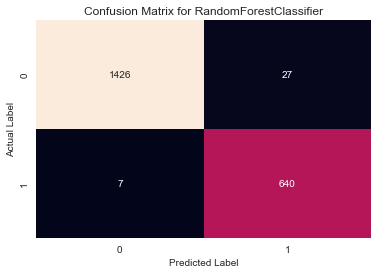

In [134]:
models_names={dtc:'DecisionTreeClassifier',rfc:'RandomForestClassifier'}

print('Accuracy for {} model is'.format(models_names[rfc]),'\n',accuracy_score(y_train,prediction_rfc))
print('\n')
print('Classification report for {} model is'.format(models_names[rfc]),'\n',classification_report(y_train,prediction_rfc))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[rfc]))
sns.heatmap(confusion_matrix(y_train,prediction_rfc),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[rfc]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

# ANN Model

In [135]:
mlp=MLPClassifier(hidden_layer_sizes=(500),solver='sgd',random_state=0,max_iter=500)

In [136]:
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=500, max_iter=500, random_state=0,
              solver='sgd')

In [137]:
prediction_ann=mlp.predict(X_train)

Accuracy for ANN model is 
 0.7723809523809524


Classification report for ANN model is 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1453
           1       0.64      0.60      0.62       647

    accuracy                           0.77      2100
   macro avg       0.73      0.72      0.73      2100
weighted avg       0.77      0.77      0.77      2100



Confusion Matrix for ANN model is


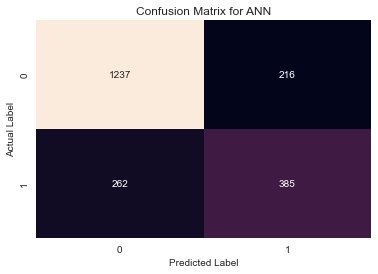

In [138]:
models_names={dtc:'DecisionTreeClassifier',rfc:'RandomForestClassifier',mlp:'ANN'}

print('Accuracy for {} model is'.format(models_names[mlp]),'\n',accuracy_score(y_train,prediction_ann))
print('\n')
print('Classification report for {} model is'.format(models_names[mlp]),'\n',classification_report(y_train,prediction_ann))
print('\n')
print('Confusion Matrix for {} model is'.format(models_names[mlp]))
sns.heatmap(confusion_matrix(y_train,prediction_ann),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format(models_names[mlp]))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

# 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

# Comparing Models on The test set

In [139]:
models=[dtc,rfc,mlp]
models_names={dtc:'DecisionTreeClassifier',rfc:'RandomForestClassifier',mlp:'ANN'}

Accuracy for DecisionTreeClassifier model is 
 0.7111111111111111


Classification report for DecisionTreeClassifier model is 
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       623
           1       0.53      0.56      0.54       277

    accuracy                           0.71       900
   macro avg       0.66      0.67      0.67       900
weighted avg       0.72      0.71      0.71       900



Confusion Matrix for DecisionTreeClassifier model is


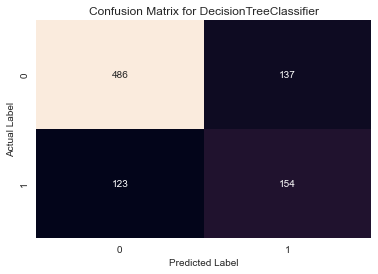

Accuracy for RandomForestClassifier model is 
 0.7566666666666667


Classification report for RandomForestClassifier model is 
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       623
           1       0.62      0.54      0.58       277

    accuracy                           0.76       900
   macro avg       0.71      0.70      0.70       900
weighted avg       0.75      0.76      0.75       900



Confusion Matrix for RandomForestClassifier model is


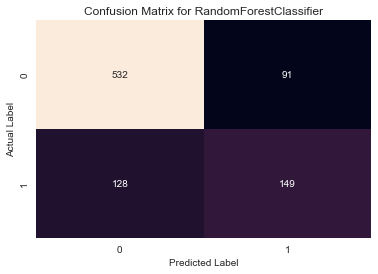

Accuracy for ANN model is 
 0.7677777777777778


Classification report for ANN model is 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       623
           1       0.65      0.53      0.59       277

    accuracy                           0.77       900
   macro avg       0.73      0.70      0.71       900
weighted avg       0.76      0.77      0.76       900



Confusion Matrix for ANN model is


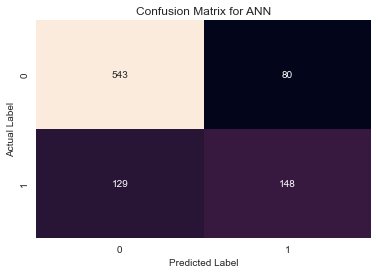

In [140]:
for i in models:
    i.fit(X_train,y_train)
    print('Accuracy for {} model is'.format(models_names[i]),'\n',accuracy_score(y_test,i.predict(X_test)))
    print('\n')
    print('Classification report for {} model is'.format(models_names[i]),'\n',classification_report(y_test,i.predict(X_test)))
    print('\n')
    print('Confusion Matrix for {} model is'.format(models_names[i]))
    sns.heatmap(confusion_matrix(y_test,i.predict(X_test)),annot=True,fmt='d',cbar=False)
    plt.title('Confusion Matrix for {}'.format(models_names[i]))
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

# AUC and ROC for the training data

AUC: 0.709


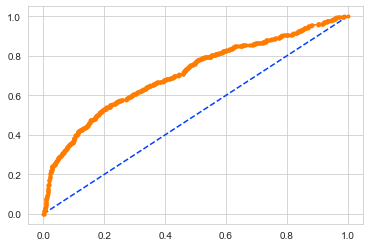

In [141]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the test data

AUC: 0.715


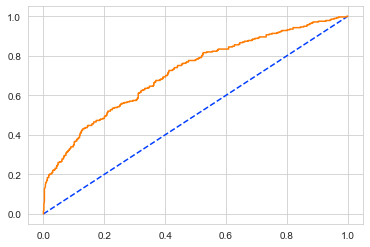

In [142]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

# Compare ROC curves and Calculate Area under the curve for all models

Area under the curve for Decision Tree Classification Model is 0.66688493431689
Area under the curve for Random Forest Classification Model is 0.7686633327731772
Area under the curve for Artificial Neural Network Model is 0.7888897902892142


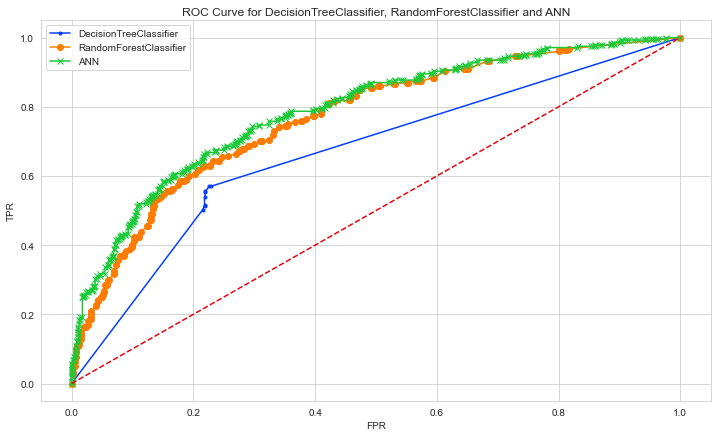

In [143]:
print('Area under the curve for Decision Tree Classification Model is',roc_auc_score(y_test,dtc.predict_proba(X_test)[:,1]))
print('Area under the curve for Random Forest Classification Model is',roc_auc_score(y_test,rfc.predict_proba(X_test)[:,1]))
print('Area under the curve for Artificial Neural Network Model is',roc_auc_score(y_test,mlp.predict_proba(X_test)[:,1]))

plt.figure(figsize=(12,7))
fpr_dtc, tpr_dtc, thresholds = roc_curve(y_test, dtc.predict_proba(X_test)[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='.') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o') 

fpr_ann, tpr_ann, thresholds = roc_curve(y_test, mlp.predict_proba(X_test)[:,1])
plt.plot(fpr_ann, tpr_ann, marker='x',) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('DecisionTreeClassifier, RandomForestClassifier and ANN'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()